<a href="https://colab.research.google.com/github/lucas-fpaiva/AnalisePred_I/blob/main/Projeto/popularity_forro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliar a popularidade de músicas de forro

In [107]:
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import sklearn

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
# from sklearn.metrics import d2_pinball_score as pinball
from sklearn.metrics import d2_tweedie_score as tweedie


from sklearn.datasets import make_classification
from ast import literal_eval

import warnings
warnings.filterwarnings('ignore')


In [74]:
def norm_mm(arr):
    return (arr-np.min(arr))/(np.max(arr)-np.min(arr))

def padroniza(data):
    data['artist'] = norm_mm(data['artist_fac'])
    data['track_year'] = norm_mm(data['track_year'])
    data['tempo'] = norm_mm(data['tempo'])
    data['time_signature'] = norm_mm(data['time_signature'])
    data['popularity']=norm_mm(data['popularity'])
    data['key'] = norm_mm(data['key'])
    data['duration_ms'] = norm_mm(data['duration_ms'])
    data['loudness'] = norm_mm(data['loudness'])
  
    return data

In [108]:
def grid_best_model (model="DT", names=False, grid="", task="R"):
  #A função retorna o modelo com os melhores parametros, os melhores parametros e o melhor score
  scoring = 'neg_mean_squared_error'
  #models = ["KNN","LM","DT","SVM", "RF", "MLP", "GB", "ADA"]
  #types = ["C","R"]
  if names == True:
    print("KNN: KNeighborsRegressor\nLM: LinearRegression\nDT: DecisionTreeRegressor\nRF: RandomForestRegressor",
          "\nGB: GradientBoostingRegressor\nSVM: Support Vector Machine\nADA: AdaBoostRegressor\nMLP: MLPRegressor")
    
  if model == "DT":
    if task == "C":
      gs_cv = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid['DT'], cv= 5, scoring='accuracy')
      gs_cv.fit(x_treino, y_treino)
      return DecisionTreeClassifier(criterion=gs_cv.best_params_['criterion'], max_depth=gs_cv.best_params_['max_depth'], min_samples_leaf=gs_cv.best_params_['min_samples_leaf'], 
                                   n_estimators=gs_cv.best_params_['n_estimators'], random_state=gs_cv.best_params_['random_state']).fit(x_treino, y_treino), gs_cv.best_params_

    elif task == "R":
      gs_cv = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=grid['DT'], cv= 5, scoring=scoring, n_jobs=-1)
      gs_cv.fit(x_treino, y_treino)
      return DecisionTreeRegressor(criterion=gs_cv.best_params_['criterion'], max_depth=gs_cv.best_params_['max_depth'], min_samples_leaf=gs_cv.best_params_['min_samples_leaf'],
                                   random_state=gs_cv.best_params_['random_state']).fit(x_treino, y_treino), gs_cv.best_params_
        
  if model=="MLP":
    if task == "C":
      gs_cv = GridSearchCV(estimator=MLPClassifier(), param_grid=grid['MLP'], cv= 5, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)
      gs_cv.fit(x_treino, y_treino)
      return MLPClassifier(hidden_layer_sizes=gs_cv.best_params_['hidden_layer_sizes'], max_iter=gs_cv.best_params_['max_iter'], activation=gs_cv.best_params_['activation'], 
                           random_state=gs_cv.best_params_['random_state']), gs_cv.best_params_
    elif task == "R":

      gs_cv = GridSearchCV(estimator=MLPRegressor(), param_grid=grid['MLP'], cv= 5, scoring=scoring, n_jobs=-1)
      gs_cv.fit(x_treino, y_treino)
      return MLPRegressor(early_stopping=True, hidden_layer_sizes=gs_cv.best_params_['hidden_layer_sizes'], max_iter=gs_cv.best_params_['max_iter'], activation=gs_cv.best_params_['activation'], 
                           random_state=gs_cv.best_params_['random_state']), gs_cv.best_params_
    
  if model == "RF":
    if task == "C":
      gs_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid['RF'], cv= 5, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)
      gs_cv.fit(x_treino, y_treino)
      return RandomForestClassifier(n_estimators=gs_cv.best_params_['n_estimators'], max_depth=gs_cv.best_params_['max_depth'], max_features=gs_cv.best_params_['max_features'], 
                             random_state=gs_cv.best_params_['random_state'], criterion=gs_cv.best_params_['criterion']), gs_cv.best_params_

    elif task == "R":
      gs_cv = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid['RF'], cv= 5, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)
      gs_cv.fit(x_treino, y_treino)
      return RandomForestRegressor(n_estimators=gs_cv.best_params_['n_estimators'], max_depth=gs_cv.best_params_['max_depth'], max_features=gs_cv.best_params_['max_features'], 
                             random_state=gs_cv.best_params_['random_state'], criterion=gs_cv.best_params_['criterion']), gs_cv.best_params_

  if model == "KNN":
    if task == "C":
      gs_cv = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=grid['KNN'], cv= 5, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)
      gs_cv.fit(x_treino, y_treino)
      return KNeighborsClassifier(n_neighbors=gs_cv.best_params_['n_neighbors'], weights=gs_cv.best_params_['weights'], metric=gs_cv.best_params_['metric']), gs_cv.best_params_

    elif task == "R":
      gs_cv = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=grid['KNN'], cv= 5, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)
      gs_cv.fit(x_treino, y_treino)
      return KNeighborsRegressor(n_neighbors=gs_cv.best_params_['n_neighbors'], weights=gs_cv.best_params_['weights'], metric=gs_cv.best_params_['metric']), gs_cv.best_params_

  if model == "LM":
    if task == "C":
      gs_cv = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=grid['LM'], cv= 5, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)
      gs_cv.fit(x_treino, y_treino)
      return KNeighborsClassifier(fit_intercept=gs_cv.best_params_['fit_intercept'], penalty=gs_cv.best_params_['penalty'], tol=gs_cv.best_params_['tol']), gs_cv.best_params_

    elif task == "R":
      gs_cv = GridSearchCV(estimator=LinearRegression(), param_grid=grid['LM'], cv= 5, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)
      gs_cv.fit(x_treino, y_treino)
      return LinearRegression(fit_intercept=gs_cv.best_params_['fit_intercept']), gs_cv.best_params_
        
  return print("KNN: KNeighborsRegressor\nLM: LinearRegression\nDT: DecisionTreeRegressor\nRF: RandomForestRegressor",
          "\nGB: GradientBoostingRegressor\nSVM: Support Vector Machine\nADA: AdaBoostRegressor\nMLP: MLPRegressor")
  
#Parâmetros do Grid
grid = {
    'RF':{ 
        'n_estimators': [20,30,40,50],
        'max_features': ['sqrt', 'log2'],
        'max_depth' : [5,10,15,20,25],
        'criterion' :['squared_error', 'absolute_error'],
        'random_state' : [0]},

    'MLP':{
        'hidden_layer_sizes': [(10,), (15,), (20,), (100,)], #[(10,10), (10,15), (20,)],
        'max_iter': [200],
        'activation' : ['relu'],
        'random_state' : [0]},

    'DT':{
        'max_depth': [5,10,15,20,25],
        'min_samples_leaf': [1,2,3,4,5],
        'criterion' :['squared_error', 'absolute_error'],
        'random_state' : [0]},

    'KNN':{
      'n_neighbors': [5,10,15,20,25],
      'weights': ['uniform', 'distance'],
      'metric' : ['manhattan', 'euclidean']},

    'LM':{
      'fit_intercept' : [True, False]}
}

## Lendo o Dataset

In [69]:
forroset = pd.read_csv('https://raw.githubusercontent.com/lucas-fpaiva/AnalisePred_I/main/Projeto/new_forroset.csv')
forroset.columns

Index(['Unnamed: 0', 'track', 'track_id', 'artist', 'artist_id', 'popularity',
       'album', 'album_id', 'track_year', 'duration_ms', 'uri', 'preview_url',
       'energy', 'liveness', 'tempo', 'speechiness', 'acousticness',
       'instrumentalness', 'time_signature', 'danceability', 'key', 'loudness',
       'valence', 'mode', 'fold_x', 'fold_y', 'artist_fac'],
      dtype='object')

In [76]:
forroset = forroset[["track_id",'popularity', 'duration_ms','track_year', 'artist_fac','energy',
       'liveness', 'tempo', 'speechiness', 'acousticness', 'instrumentalness',
       'time_signature', 'danceability', 'key', 'loudness', 'valence', 'mode', 'fold_x']]

forroset = forroset.rename(columns={'fold_x':'folds'})

## Avaliando a Árvore de Decisão

In [117]:
def metrics (y_true, y_pred):
  return [mae(y_true, y_pred), mape(y_true, y_pred), mse(y_true, y_pred), mse(y_true, y_pred, squared=False), r2(y_true, y_pred), tweedie(y_true, y_pred)]

In [ ]:
data_results = pd.DataFrame([],columns=['fold','model','parameters','mae','mape', 'mse','rmse','r2','tweedie'])
results = []
name_model="MLP"
for k in range(1,6):
  treino = forroset[forroset.folds!=k][forroset.popularity>0]
  teste  = forroset[forroset.folds==k][forroset.popularity>0]

  teste = padroniza(teste)
  treino = padroniza(treino)
  
  x_treino = treino.drop(['folds','track_id','popularity'], axis=1)
  y_treino = treino.popularity

  x_teste = teste.drop(['folds','track_id','popularity'], axis=1)
  y_teste = teste.popularity

  model, best_parameters = grid_best_model(model=name_model, grid=grid)
  model.fit(x_treino, y_treino)
  y_pred= model.predict(x_teste)

  print("Melhor parametro:", best_parameters)         
  print("Fold", k, metrics(y_teste, y_pred))

  result = metrics(y_teste, y_pred)
  result.append(k)
  result.append(name_model)
  result.append(best_parameters)
  
  results.append(result)
        
data_results = pd.concat([data_results, pd.DataFrame([results],columns=['mae','mape', 'mse','rmse','r2','tweedie', 'fold','model','parameters'])])



Melhor parametro: {'activation': 'relu', 'hidden_layer_sizes': (20,), 'max_iter': 200, 'random_state': 0}
Fold 1 [0.13559026987311784, 57703492628234.36, 0.033561716053065134, 0.18319857000824305, -0.017194243290440614, -0.017194243290440614]
Melhor parametro: {'activation': 'relu', 'hidden_layer_sizes': (20,), 'max_iter': 200, 'random_state': 0}
Fold 2 [0.1362165824374356, 36480009776278.39, 0.035228824037070436, 0.18769343099072602, -0.2522284297125583, -0.25222842971255854]
Melhor parametro: {'activation': 'relu', 'hidden_layer_sizes': (10,), 'max_iter': 200, 'random_state': 0}
Fold 3 [0.1242367957290099, 43834912814630.305, 0.028689548394013754, 0.16937989371237, -0.12686665902605143, -0.12686665902605165]


### Predição do Modelo

In [80]:
model.fit(x_treino, y_treino)
np.sqrt(model.score(x_treino, y_treino))

0.6288772407334856

In [130]:
model.score(x_teste, y_teste)

-0.19716194900973272

In [82]:
y_pred_t = model.predict(x_treino)

In [83]:
y_pred= model.predict(x_teste)

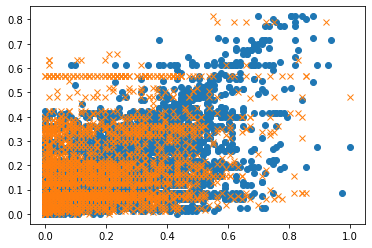

In [84]:
plt.plot(y_treino, y_pred_t, 'o')

plt.plot(y_teste, y_pred, 'x')


#### MAPE

In [85]:
mape(y_teste,y_pred)*100

5825345360794023.0

nan

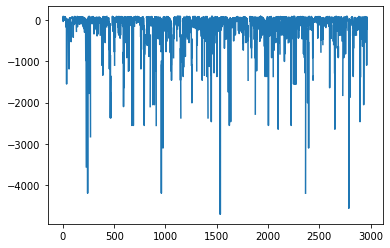

In [86]:
plt.plot(((y_teste.values - y_pred)/y_teste.values)*100)
np.mean(100*np.abs(y_teste.values - y_pred)/y_teste.values)

#### Plot do Modelo Teste x Treino

(0.0, 0.3)

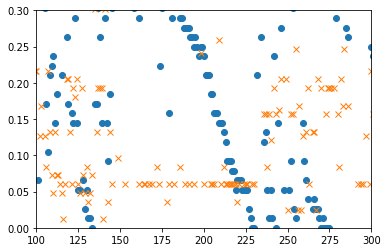

In [91]:
plt.plot(y_teste.values, 'o')
plt.plot(y_pred, 'x')
plt.xlim([100,300])
plt.ylim([0,0.3])

In [ ]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true+0.00001))) * 100

In [ ]:
def mae (y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [ ]:
def r2_score(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

0.24169303797468356